In [167]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
import matplotlib.pyplot as plt
import pickle as pkl

In [154]:
data = pd.read_csv("Walmart_Store_sales.csv")

In [155]:
data.head()

,Store,Month,Day,Year,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,28,1,10,2010,1/10/2010,1203080.41,0,85.20,3.00,126.23,14.31
1,29,1,10,2010,1/10/2010,474698.01,0,69.31,2.72,132.76,10.52
2,30,1,10,2010,1/10/2010,445475.30,0,70.28,2.60,211.33,8.16
3,31,1,10,2010,1/10/2010,1213981.64,0,70.28,2.60,211.33,8.16
4,32,1,10,2010,1/10/2010,1061089.56,0,66.14,2.76,190.67,9.14


In [156]:
x = data.drop(['Weekly_Sales', 'Date'], axis = 1) # Features
y = data['Weekly_Sales'] # Target

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 1000, random_state = 28)
model.fit(x_train, y_train) 

In [172]:
filename = 'model.pkl'
pkl.dump(model, open(filename, 'wb'))

In [158]:
y_pred = model.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  150619.75


In [159]:
groupedData = data.loc[data['Store'] == 28]

In [163]:
groupedData = groupedData.groupby(['Date', 'Store']).sum("Weekly_Sales")
groupedData = groupedData.reset_index()
groupedData = groupedData.sort_values(by=['Year', 'Month', 'Day'])
groupedData
output_data = groupedData.to_csv('output.csv')

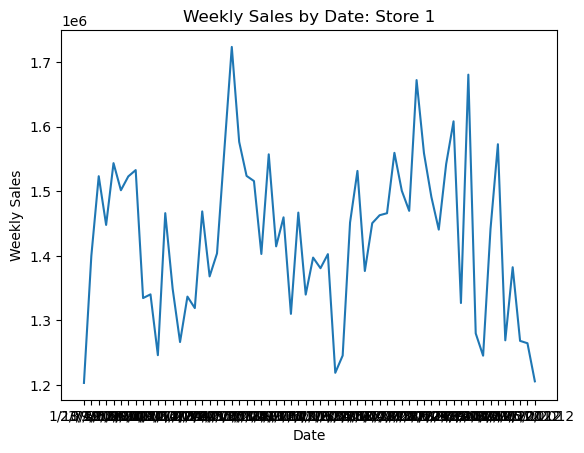

In [161]:
plt.plot(groupedData['Date'], groupedData['Weekly_Sales'])
plt.title("Weekly Sales by Date: Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()